# Necessary Imports

In [24]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.sentiment import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


## Read the File

In [2]:
df=pd.read_csv("review_final.csv")
df

,Unnamed: 0,Reviews,Bank
0,0,Rbl bank credit card no response for customer ...,RBL-Bank-Fun-Credit-Card
1,1,I am eligible RBL credit card but I have no re...,RBL-Bank-Fun-Credit-Card
2,2,Don’t go for this credit card at all even if t...,RBL-Bank-Fun-Credit-Card
3,3,They only professional to cheat you by putting...,RBL-Bank-Fun-Credit-Card
4,4,Overall conclusion is the person who use this ...,RBL-Bank-Fun-Credit-Card
...,...,...,...
2695,2695,The worst card you can ever have. They will d...,RBL-Bank-Fun-Credit-Card
2696,2696,I was told 20000reward points as welcome gift ...,RBL-Bank-Fun-Credit-Card
2697,2697,But it is a lie,RBL-Bank-Fun-Credit-Card
2698,2698,This is worst and poor bank I have ever seen f...,RBL-Bank-Fun-Credit-Card


## Drop Unncessary columns

In [3]:
df=df.drop(columns="Unnamed: 0")
df

,Reviews,Bank
0,Rbl bank credit card no response for customer ...,RBL-Bank-Fun-Credit-Card
1,I am eligible RBL credit card but I have no re...,RBL-Bank-Fun-Credit-Card
2,Don’t go for this credit card at all even if t...,RBL-Bank-Fun-Credit-Card
3,They only professional to cheat you by putting...,RBL-Bank-Fun-Credit-Card
4,Overall conclusion is the person who use this ...,RBL-Bank-Fun-Credit-Card
...,...,...
2695,The worst card you can ever have. They will d...,RBL-Bank-Fun-Credit-Card
2696,I was told 20000reward points as welcome gift ...,RBL-Bank-Fun-Credit-Card
2697,But it is a lie,RBL-Bank-Fun-Credit-Card
2698,This is worst and poor bank I have ever seen f...,RBL-Bank-Fun-Credit-Card


## Download Necessary Packages

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\niran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\niran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\niran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Text Preprocessing

In [5]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [6]:
def preprocess_text(text):
    words = word_tokenize(text.lower())  
    words = [word for word in words if word.isalpha()]  
    words = [word for word in words if word not in stop_words]  
    words = [lemmatizer.lemmatize(word) for word in words]  
    return ' '.join(words)

df['cleaned_review'] = df['Reviews'].apply(preprocess_text)
df

,Reviews,Bank,cleaned_review
0,Rbl bank credit card no response for customer ...,RBL-Bank-Fun-Credit-Card,rbl bank credit card response customer bad ser...
1,I am eligible RBL credit card but I have no re...,RBL-Bank-Fun-Credit-Card,eligible rbl credit card received card applica...
2,Don’t go for this credit card at all even if t...,RBL-Bank-Fun-Credit-Card,go credit card even give reward use
3,They only professional to cheat you by putting...,RBL-Bank-Fun-Credit-Card,professional cheat putting fake charge fake cu...
4,Overall conclusion is the person who use this ...,RBL-Bank-Fun-Credit-Card,overall conclusion person use credit card real...
...,...,...,...
2695,The worst card you can ever have. They will d...,RBL-Bank-Fun-Credit-Card,worst card ever mi selling
2696,I was told 20000reward points as welcome gift ...,RBL-Bank-Fun-Credit-Card,told point welcome gift spend
2697,But it is a lie,RBL-Bank-Fun-Credit-Card,lie
2698,This is worst and poor bank I have ever seen f...,RBL-Bank-Fun-Credit-Card,worst poor bank ever seen harass least barrier...


## TF-IDF Vectorization

In [7]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_review'])

## 1)K-Means Clustering

In [8]:
kmeans_num_clusters = 5  
kmeans = KMeans(n_clusters=kmeans_num_clusters)
kmeans_cluster_labels=kmeans.fit_predict(tfidf_matrix)





In [9]:
# sentiment(kmeans_cluster_labels,kmeans_num_clusters,df)

## 2)Agglomerative Clustering

In [10]:
hier_num_clusters = 5  
hierarchical = AgglomerativeClustering(n_clusters=hier_num_clusters)
hier_cluster_labels = hierarchical.fit_predict(tfidf_matrix.toarray())



## 3)BIRCH

In [11]:
birch_num_clusters=5
model = Birch(threshold=0.01, n_clusters=birch_num_clusters)
birch_cluster_labels = model.fit_predict(tfidf_matrix.toarray())


In [12]:
set(birch_cluster_labels)

{0, 1, 2, 3, 4}

## 4)BERT - Transformer Model

In [13]:
pip install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [15]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification
import torch

C:\Users\niran\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
tokenizer=AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model=AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')


In [17]:
def sentiment_bert(review):
    tokens=tokenizer.encode(review,return_tensors='pt')
    result=model(tokens)
    return int(torch.argmax(result.logits))

In [18]:
bert_cluster_labels=df['cleaned_review'].apply(lambda x: sentiment_bert(x[:2701]))
bert_cluster_labels

0       0
1       4
2       4
3       0
4       0
       ..
2695    0
2696    4
2697    2
2698    0
2699    0
Name: cleaned_review, Length: 2700, dtype: int64

In [19]:
bert_cluster_labels=bert_cluster_labels.to_list()


In [20]:
bert_cluster_labels = [np.int64(x) for x in bert_cluster_labels]


## Function to Calculate Sentiment Scores per Cluster and Rank Banks

In [21]:
def sentiment(cluster_labels,df):
    sia = SentimentIntensityAnalyzer()
    cluster_sentiments = {}
    for cluster in set(cluster_labels):
        cluster_reviews = df[cluster_labels == cluster]['cleaned_review']
        cluster_bank_counts = df[cluster_labels == cluster]['Bank'].value_counts()
        sentiment_scores = []
        for review in cluster_reviews:
            sentiment_score = sia.polarity_scores(review)['compound']
            sentiment_scores.append(sentiment_score)
        
        avg_sentiment = sum(sentiment_scores) / len(sentiment_scores)
        cluster_sentiments[cluster] = {'sentiment': avg_sentiment, 'bank_counts': cluster_bank_counts}
    overall_bank_sentiments = {}
    for cluster, info in cluster_sentiments.items():
        for bank, count in info['bank_counts'].items():
            if bank not in overall_bank_sentiments:
                overall_bank_sentiments[bank] = 0
            overall_bank_sentiments[bank] += info['sentiment'] * count
    

    ranked_banks = sorted(overall_bank_sentiments.items(), key=lambda x: x[1], reverse=True)
    
    print("Ranked Banks Based on Sentiment Analysis and Frequency Distribution:")
    for rank, (bank, sentiment_score) in enumerate(ranked_banks, start=1):
        print(f"{rank}. {bank}: {sentiment_score}")
    return ranked_banks
        
    

## Finding Top 3 Cards 

In [22]:
def top3(cluster_label,df):
    ranked_banks=sentiment(cluster_label,df)
    return ranked_banks[:3]

In [25]:
top3_kmeans=top3(kmeans_cluster_labels,df)
top3_hier=top3(hier_cluster_labels,df)
top3_birch=top3(birch_cluster_labels,df)
top3_bert=top3(bert_cluster_labels,df)

Ranked Banks Based on Sentiment Analysis and Frequency Distribution:
1. IndianOil-Citibank-Credit-Card: 58.553179579053776
2. Kotak-Mahindra-Bank-Visa-Credit-Card: 42.20137188864874
3. ICICI-Bank-Visa-Credit-Card: 31.172910137562333
4. SBI-Visa-Credit-Card: 30.755513712424822
5. RBL-Bank-Fun-Credit-Card: 28.33112954754514
6. Citibank-Visa-Credit-Card: 18.12437759432928
7. Bajaj-Finserv-RBL-Bank-SuperCard: 17.53873898243747
8. Yes-Bank-American-Express-Credit-Card: 15.07654149697391
9. Tata-Card: 12.883216204880187
10. HDFC-Regalia-Credit-Card: 12.762499978176132
11. Standard-Chartered-Visa-Credit-Card: 12.672817236938924
12. HDFC-Bank-MoneyBack-Credit-Card: 11.8507007422415
13. HDFC-Bank-Visa-Credit-Card: 11.673992808041561
14. Axis-Bank-Visa-Credit-Card: 8.915268100888868
15. SBI-Simply-Click-Credit-Card: 6.772637672666263
16. SBI-SimplySave-Credit-Card: 6.742612070264229
17. American-Express-Gift-Card: 4.246268825513203
18. HDFC-Bank-ForexPlus-Card: 3.932002421460568
19. IndusInd-Vis

In [26]:
from collections import Counter
first=[]
second=[]
third=[]
for i in [top3_kmeans,top3_hier,top3_birch,top3_bert]:
    first.append(i[0][0])
    second.append(i[1][0])
    third.append(i[2][0])
x=Counter(first)
y=Counter(second)
z=Counter(third)
first_most_common=x.most_common(1)[0][0]
second_most_common=y.most_common(1)[0][0]
third_most_common=z.most_common(1)[0][0]

In [28]:
first_filtered_reviews=df[df['Bank']==first_most_common]
first_filtered_reviews=first_filtered_reviews["cleaned_review"].to_list()
second_filtered_reviews=df[df['Bank']==second_most_common]
second_filtered_reviews=second_filtered_reviews["cleaned_review"].to_list()
third_filtered_reviews=df[df['Bank']==third_most_common]
third_filtered_reviews=third_filtered_reviews["cleaned_review"].to_list()
dict_top3={first_most_common:first_filtered_reviews,second_most_common:second_filtered_reviews,third_most_common:third_filtered_reviews}

## Finding Top 5 Positive Words in the reviews

In [29]:
all_reviews = [review for reviews_list in dict_top3.values() for review in reviews_list]
stop_words = set(stopwords.words('english'))
all_words = [word.lower() for review in all_reviews for word in word_tokenize(review) if word.isalnum() and word.lower() not in stop_words]
sia = SentimentIntensityAnalyzer()
positive_words = [word for word in all_words if sia.polarity_scores(word)['compound'] > 0]
positive_word_freq = Counter(positive_words)
top_positive_words = positive_word_freq.most_common(6)
if top_positive_words:
    top_positive_words=top_positive_words[1:]
word_freq_by_card = {card_name: {word: positive_word_freq[word] for word, _ in top_positive_words} for card_name, reviews_list in dict_top3.items()}
print("Top 5 positive words:")
for word, freq in top_positive_words:
    print(f"{word}: {freq}")



Top 5 positive words:
care: 116
interest: 73
like: 67
reward: 56
good: 40


## Plotting Graph of Frequency Distribution

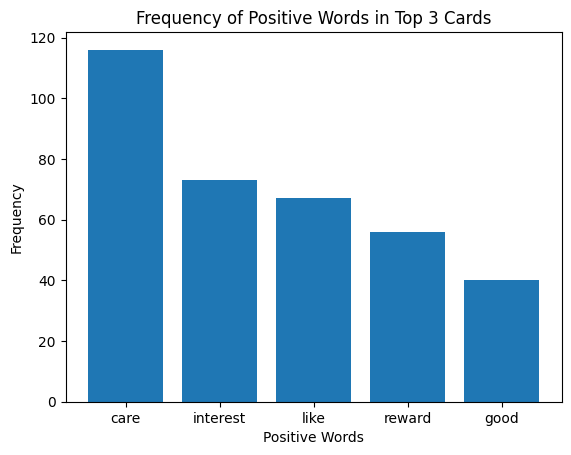

In [30]:
import matplotlib.pyplot as plt
keys=[]
values=[]
for i,j in top_positive_words:
    keys.append(i)
    values.append(j)
plt.bar(keys,values)
plt.xlabel("Positive Words")
plt.ylabel("Frequency")
plt.title("Frequency of Positive Words in Top 3 Cards")
plt.show()

In [31]:
pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


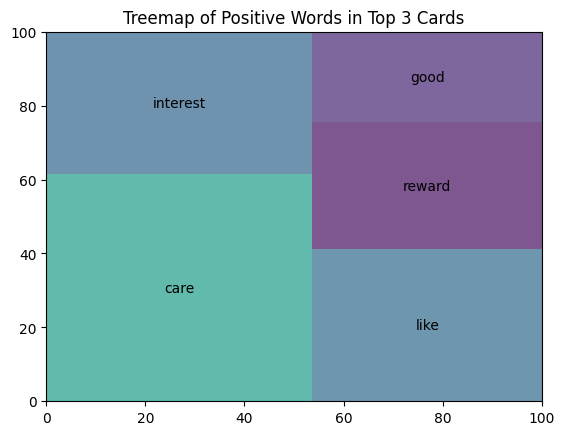

In [32]:
import squarify
squarify.plot(sizes=values,label=keys,alpha=0.7)
plt.title("Treemap of Positive Words in Top 3 Cards")
plt.show()

In [33]:
sentiment(kmeans_cluster_labels,df)

Ranked Banks Based on Sentiment Analysis and Frequency Distribution:
1. IndianOil-Citibank-Credit-Card: 58.553179579053776
2. Kotak-Mahindra-Bank-Visa-Credit-Card: 42.20137188864874
3. ICICI-Bank-Visa-Credit-Card: 31.172910137562333
4. SBI-Visa-Credit-Card: 30.755513712424822
5. RBL-Bank-Fun-Credit-Card: 28.33112954754514
6. Citibank-Visa-Credit-Card: 18.12437759432928
7. Bajaj-Finserv-RBL-Bank-SuperCard: 17.53873898243747
8. Yes-Bank-American-Express-Credit-Card: 15.07654149697391
9. Tata-Card: 12.883216204880187
10. HDFC-Regalia-Credit-Card: 12.762499978176132
11. Standard-Chartered-Visa-Credit-Card: 12.672817236938924
12. HDFC-Bank-MoneyBack-Credit-Card: 11.8507007422415
13. HDFC-Bank-Visa-Credit-Card: 11.673992808041561
14. Axis-Bank-Visa-Credit-Card: 8.915268100888868
15. SBI-Simply-Click-Credit-Card: 6.772637672666263
16. SBI-SimplySave-Credit-Card: 6.742612070264229
17. American-Express-Gift-Card: 4.246268825513203
18. HDFC-Bank-ForexPlus-Card: 3.932002421460568
19. IndusInd-Vis

[('IndianOil-Citibank-Credit-Card', 58.553179579053776),
 ('Kotak-Mahindra-Bank-Visa-Credit-Card', 42.20137188864874),
 ('ICICI-Bank-Visa-Credit-Card', 31.172910137562333),
 ('SBI-Visa-Credit-Card', 30.755513712424822),
 ('RBL-Bank-Fun-Credit-Card', 28.33112954754514),
 ('Citibank-Visa-Credit-Card', 18.12437759432928),
 ('Bajaj-Finserv-RBL-Bank-SuperCard', 17.53873898243747),
 ('Yes-Bank-American-Express-Credit-Card', 15.07654149697391),
 ('Tata-Card', 12.883216204880187),
 ('HDFC-Regalia-Credit-Card', 12.762499978176132),
 ('Standard-Chartered-Visa-Credit-Card', 12.672817236938924),
 ('HDFC-Bank-MoneyBack-Credit-Card', 11.8507007422415),
 ('HDFC-Bank-Visa-Credit-Card', 11.673992808041561),
 ('Axis-Bank-Visa-Credit-Card', 8.915268100888868),
 ('SBI-Simply-Click-Credit-Card', 6.772637672666263),
 ('SBI-SimplySave-Credit-Card', 6.742612070264229),
 ('American-Express-Gift-Card', 4.246268825513203),
 ('HDFC-Bank-ForexPlus-Card', 3.932002421460568),
 ('IndusInd-Visa-Credit-Card', 3.8622078

In [34]:
sentiment(hier_cluster_labels,df)

Ranked Banks Based on Sentiment Analysis and Frequency Distribution:
1. IndianOil-Citibank-Credit-Card: 62.080809001224736
2. Kotak-Mahindra-Bank-Visa-Credit-Card: 41.20590884874465
3. RBL-Bank-Fun-Credit-Card: 28.796371351500305
4. Citibank-Visa-Credit-Card: 22.328585974280465
5. Bajaj-Finserv-RBL-Bank-SuperCard: 20.531800930802206
6. SBI-Visa-Credit-Card: 20.42035951112472
7. Tata-Card: 18.416839266993264
8. Yes-Bank-American-Express-Credit-Card: 17.442548233517044
9. HDFC-Regalia-Credit-Card: 16.466947711777916
10. Standard-Chartered-Visa-Credit-Card: 15.408897917942438
11. HDFC-Bank-MoneyBack-Credit-Card: 15.064161812818943
12. HDFC-Bank-Visa-Credit-Card: 10.826719595835886
13. American-Express-Gift-Card: 9.484198928352725
14. Axis-Bank-Visa-Credit-Card: 8.225351305980812
15. SBI-Simply-Click-Credit-Card: 8.20965140620535
16. HDFC-Bank-ForexPlus-Card: 7.9230636099203915
17. SBI-SimplySave-Credit-Card: 7.128608434782609
18. IndusInd-Visa-Credit-Card: 4.6232718409879565
19. ICICI-Ban

[('IndianOil-Citibank-Credit-Card', 62.080809001224736),
 ('Kotak-Mahindra-Bank-Visa-Credit-Card', 41.20590884874465),
 ('RBL-Bank-Fun-Credit-Card', 28.796371351500305),
 ('Citibank-Visa-Credit-Card', 22.328585974280465),
 ('Bajaj-Finserv-RBL-Bank-SuperCard', 20.531800930802206),
 ('SBI-Visa-Credit-Card', 20.42035951112472),
 ('Tata-Card', 18.416839266993264),
 ('Yes-Bank-American-Express-Credit-Card', 17.442548233517044),
 ('HDFC-Regalia-Credit-Card', 16.466947711777916),
 ('Standard-Chartered-Visa-Credit-Card', 15.408897917942438),
 ('HDFC-Bank-MoneyBack-Credit-Card', 15.064161812818943),
 ('HDFC-Bank-Visa-Credit-Card', 10.826719595835886),
 ('American-Express-Gift-Card', 9.484198928352725),
 ('Axis-Bank-Visa-Credit-Card', 8.225351305980812),
 ('SBI-Simply-Click-Credit-Card', 8.20965140620535),
 ('HDFC-Bank-ForexPlus-Card', 7.9230636099203915),
 ('SBI-SimplySave-Credit-Card', 7.128608434782609),
 ('IndusInd-Visa-Credit-Card', 4.6232718409879565),
 ('ICICI-Bank-Visa-Credit-Card', 2.81

In [35]:
sentiment(birch_cluster_labels,df)

Ranked Banks Based on Sentiment Analysis and Frequency Distribution:
1. IndianOil-Citibank-Credit-Card: 56.11113680129523
2. Kotak-Mahindra-Bank-Visa-Credit-Card: 33.88310094302913
3. SBI-Visa-Credit-Card: 30.700278839202355
4. RBL-Bank-Fun-Credit-Card: 28.085702123484346
5. Citibank-Visa-Credit-Card: 22.045199791110107
6. Bajaj-Finserv-RBL-Bank-SuperCard: 21.243215782456268
7. ICICI-Bank-Visa-Credit-Card: 19.610621540450833
8. HDFC-Regalia-Credit-Card: 17.066752658810582
9. Tata-Card: 16.632786086883875
10. HDFC-Bank-MoneyBack-Credit-Card: 14.912507307065852
11. Yes-Bank-American-Express-Credit-Card: 14.256828766276957
12. American-Express-Gift-Card: 9.999431497563922
13. Standard-Chartered-Visa-Credit-Card: 9.745049000935968
14. HDFC-Bank-ForexPlus-Card: 9.019928978605432
15. SBI-Simply-Click-Credit-Card: 8.507091553465436
16. HDFC-Bank-Visa-Credit-Card: 8.482545336709684
17. SBI-SimplySave-Credit-Card: 7.621498935003256
18. Axis-Bank-Visa-Credit-Card: 5.569491736844484
19. IndusInd-

[('IndianOil-Citibank-Credit-Card', 56.11113680129523),
 ('Kotak-Mahindra-Bank-Visa-Credit-Card', 33.88310094302913),
 ('SBI-Visa-Credit-Card', 30.700278839202355),
 ('RBL-Bank-Fun-Credit-Card', 28.085702123484346),
 ('Citibank-Visa-Credit-Card', 22.045199791110107),
 ('Bajaj-Finserv-RBL-Bank-SuperCard', 21.243215782456268),
 ('ICICI-Bank-Visa-Credit-Card', 19.610621540450833),
 ('HDFC-Regalia-Credit-Card', 17.066752658810582),
 ('Tata-Card', 16.632786086883875),
 ('HDFC-Bank-MoneyBack-Credit-Card', 14.912507307065852),
 ('Yes-Bank-American-Express-Credit-Card', 14.256828766276957),
 ('American-Express-Gift-Card', 9.999431497563922),
 ('Standard-Chartered-Visa-Credit-Card', 9.745049000935968),
 ('HDFC-Bank-ForexPlus-Card', 9.019928978605432),
 ('SBI-Simply-Click-Credit-Card', 8.507091553465436),
 ('HDFC-Bank-Visa-Credit-Card', 8.482545336709684),
 ('SBI-SimplySave-Credit-Card', 7.621498935003256),
 ('Axis-Bank-Visa-Credit-Card', 5.569491736844484),
 ('IndusInd-Visa-Credit-Card', 3.6066

In [36]:
sentiment(bert_cluster_labels,df)

Ranked Banks Based on Sentiment Analysis and Frequency Distribution:
1. IndianOil-Citibank-Credit-Card: 58.58288398788284
2. SBI-Visa-Credit-Card: 37.361030499597774
3. Kotak-Mahindra-Bank-Visa-Credit-Card: 34.99050027258668
4. ICICI-Bank-Visa-Credit-Card: 25.16124069359732
5. HDFC-Bank-MoneyBack-Credit-Card: 24.47800857355088
6. Yes-Bank-American-Express-Credit-Card: 22.65744668366557
7. Citibank-Visa-Credit-Card: 22.227833925391977
8. Tata-Card: 20.462584645762142
9. RBL-Bank-Fun-Credit-Card: 14.829235114115294
10. Bajaj-Finserv-RBL-Bank-SuperCard: 12.490598855760524
11. HDFC-Regalia-Credit-Card: 11.61535448244738
12. American-Express-Gift-Card: 10.47468332892733
13. HDFC-Bank-ForexPlus-Card: 10.237243435279169
14. SBI-Simply-Click-Credit-Card: 7.442549259201529
15. Standard-Chartered-Visa-Credit-Card: 6.663817632038304
16. HDFC-Bank-Visa-Credit-Card: 6.213983093546542
17. SBI-SimplySave-Credit-Card: 5.488872598314307
18. Axis-Bank-Visa-Credit-Card: 4.400969088302859
19. IndusInd-Vis

[('IndianOil-Citibank-Credit-Card', 58.58288398788284),
 ('SBI-Visa-Credit-Card', 37.361030499597774),
 ('Kotak-Mahindra-Bank-Visa-Credit-Card', 34.99050027258668),
 ('ICICI-Bank-Visa-Credit-Card', 25.16124069359732),
 ('HDFC-Bank-MoneyBack-Credit-Card', 24.47800857355088),
 ('Yes-Bank-American-Express-Credit-Card', 22.65744668366557),
 ('Citibank-Visa-Credit-Card', 22.227833925391977),
 ('Tata-Card', 20.462584645762142),
 ('RBL-Bank-Fun-Credit-Card', 14.829235114115294),
 ('Bajaj-Finserv-RBL-Bank-SuperCard', 12.490598855760524),
 ('HDFC-Regalia-Credit-Card', 11.61535448244738),
 ('American-Express-Gift-Card', 10.47468332892733),
 ('HDFC-Bank-ForexPlus-Card', 10.237243435279169),
 ('SBI-Simply-Click-Credit-Card', 7.442549259201529),
 ('Standard-Chartered-Visa-Credit-Card', 6.663817632038304),
 ('HDFC-Bank-Visa-Credit-Card', 6.213983093546542),
 ('SBI-SimplySave-Credit-Card', 5.488872598314307),
 ('Axis-Bank-Visa-Credit-Card', 4.400969088302859),
 ('IndusInd-Visa-Credit-Card', 2.2691812